In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [11]:
df = pd.read_csv("Churn-Modelling.csv")

In [12]:
# afficher les 5 premiers fichiers du dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,"101348,88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83807,86",1,0,1,"112542,58",0
2,3,15619304,Onio,502,France,Female,42,8,"159660,8",3,1,0,"113931,57",1
3,4,15701354,Boni,699,France,Female,39,1,0,2,0,0,"93826,63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125510,82",1,1,1,"79084,1",0


Analyse Exploration des données(EDA)


In [4]:
# Verification des valeurs nulles dans la base de données 
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
# les dimensions du dataframe
df.shape

(10000, 14)

In [6]:
# afficher les clonnes 
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
# verification des duplicatat
df.duplicated().sum()

0

In [8]:
# affichage d'un recap de valeurs existantes par colonnes dans le jeu de données 
for i in df.columns:
    a = df.value_counts(i)
    print(f'\n\n\nvalues of {a}')




values of RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Length: 10000, dtype: int64



values of CustomerId
15565701    1
15732281    1
15732199    1
15732202    1
15732235    1
           ..
15649297    1
15649354    1
15649359    1
15649379    1
15815690    1
Length: 10000, dtype: int64



values of Surname
Smith         32
Martin        29
Scott         29
Walker        28
Brown         26
              ..
Etheridge      1
Milliner       1
Milligan       1
Eva            1
Kuykendall     1
Length: 2932, dtype: int64



values of CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
441      1
440      1
423      1
424      1
358      1
Length: 460, dtype: int64



values of Geography
France     5014
Germany    2509
Spain      2477
dtype: int64



values of Gender
Male      5457
Female    4543
dtype: int64



values of Age
37    478
38    477
35    474
36    456
34    447
 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RowNumber        10000 non-null  int64 
 1   CustomerId       10000 non-null  int64 
 2   Surname          10000 non-null  object
 3   CreditScore      10000 non-null  int64 
 4   Geography        10000 non-null  object
 5   Gender           10000 non-null  object
 6   Age              10000 non-null  int64 
 7   Tenure           10000 non-null  int64 
 8   Balance          10000 non-null  object
 9   NumOfProducts    10000 non-null  int64 
 10  HasCrCard        10000 non-null  int64 
 11  IsActiveMember   10000 non-null  int64 
 12  EstimatedSalary  10000 non-null  object
 13  Exited           10000 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,1.530200,0.70550,0.515100,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,0.581654,0.45584,0.499797,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,1.000000,0.00000,0.000000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,1.000000,1.00000,1.000000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,2.000000,1.00000,1.000000,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,4.000000,1.00000,1.000000,1.000000


Visualisation des variables categorielles

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


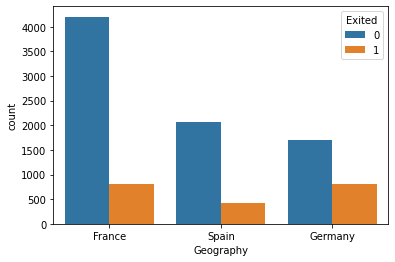

In [ ]:
# pays en fonction des abonnement et desabonnement
sns.countplot('Geography', hue = 'Exited', data = df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


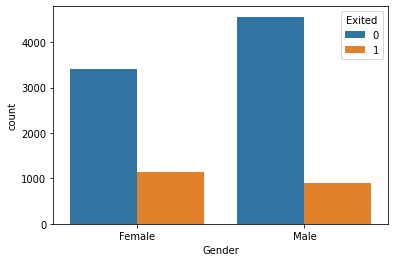

In [ ]:
sns.countplot('Gender', hue = 'Exited', data = df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



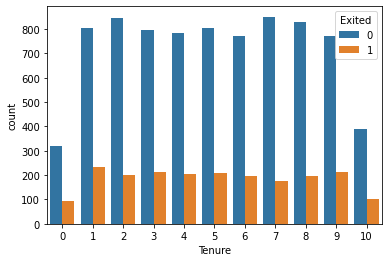

In [ ]:
sns.countplot('Tenure', hue = 'Exited', data = df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



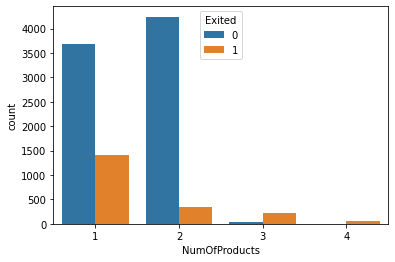

In [ ]:
sns.countplot('NumOfProducts', hue = 'Exited', data = df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



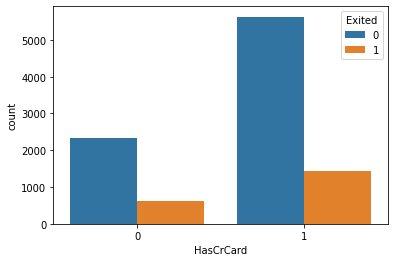

In [ ]:
sns.countplot('HasCrCard', hue = 'Exited', data = df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



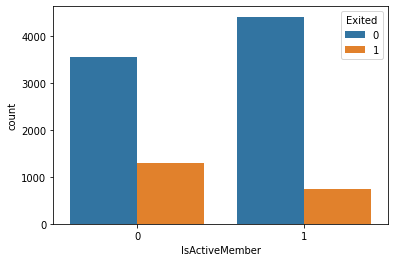

In [ ]:
sns.countplot('IsActiveMember', hue = 'Exited', data = df)

visualisation des variable continues

In [ ]:
import plotly.express as px
fig = px.box(df, x="Exited", y="CreditScore")
fig.show()

In [ ]:
import plotly.express as px
fig = px.box(df, x="Exited", y="Age")
fig.show()

In [ ]:
df['Balance'] = df['Balance'].replace(',','.')
df.dtypes

RowNumber           int64
CustomerId          int64
Surname            object
CreditScore         int64
Geography          object
Gender             object
Age                 int64
Tenure              int64
Balance            object
NumOfProducts       int64
HasCrCard           int64
IsActiveMember      int64
EstimatedSalary    object
Exited              int64
dtype: object

In [ ]:
import plotly.express as px
fig = px.box(df, x="Exited", y="Balance")
fig.show()

In [ ]:
# correlation 
df.corr().T

,RowNumber,CustomerId,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,0.007246,0.000599,0.012044,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,0.016972,-0.014025,0.001665,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.012238,-0.005458,0.025651,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,-0.030680,-0.011721,0.085472,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,0.013444,0.022583,-0.028362,-0.014001
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,1.000000,0.003183,0.009612,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,0.003183,1.000000,-0.011866,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,0.009612,-0.011866,1.000000,-0.156128
Exited,-0.016571,-0.006248,-0.027094,0.285323,-0.014001,-0.047820,-0.007138,-0.156128,1.000000


In [14]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [15]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

In [16]:
# 1ere méthode : Application de LabelEncoder sur toute la df
df = df.apply(LabelEncoder().fit_transform)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,228,0,0,24,2,0,0,1,1,93,1
1,217,2,0,23,1,5540,0,0,1,724,0
2,111,0,0,24,8,4211,2,1,0,795,1
3,308,0,0,21,1,0,1,0,0,9671,0
4,459,2,0,25,2,2113,0,1,1,8802,0


In [17]:
y = df["Exited"]
X = df.drop(["Exited"], axis = 1)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X = scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (8000, 10)
Test set: (2000, 10)


In [ ]:
# Models
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_pred= model1.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
acc= metrics.accuracy_score(y_test, y_pred)
acc

0.8125

In [ ]:
cm= metrics.confusion_matrix(y_test,y_pred)
cm

array([[1576,   41],
       [ 336,   47]])

In [ ]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
model_svc_1 = SVC(gamma=0.22)
model_svc_1.fit(X_train, y_train)
#y_pred = model_svc_1.predict(X_test)
#acc= metrics.accuracy_score(y_test, y_pred)
score_svc = model_svc_1.score(X_test,y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.8085


In [ ]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.8595


In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.778


In [ ]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.832


on voit que le modèle qui a un meilleur 

rendement est le randomforestClassifer et on va grid search cv pour regler les bons paramètres

In [ ]:
from sklearn.model_selection import GridSearchCV
  
parameters = {
    'n_estimators'      : [320,330,340],
    'max_depth'         : [8, 9, 10, 11, 12],
    'random_state'      : [0],
    #'max_features': ['auto'],
    #'criterion' :['gini']
}

  
grid = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=-1)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 9, 10, 11, 12],
                         'n_estimators': [320, 330, 340], 'random_state': [0]})

In [ ]:
# affichons les meilleurs paramètres
grid.best_params_

{'max_depth': 12, 'n_estimators': 330, 'random_state': 0}

In [ ]:
# les meilleurs estimateurs
grid.best_estimator_

RandomForestClassifier(max_depth=12, n_estimators=330, random_state=0)

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1617
           1       0.78      0.40      0.53       383

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.72      2000
weighted avg       0.85      0.86      0.85      2000



[  72  217  362  508  653  799  944 1090 1235 1381 1526 1672 1817 1963
 2108 2254 2399 2544 2690 2835 2981 3126 3272 3417 3563 3708 3854 3999
 4145 4290 4436 4581 4727 4872 5017 5163 5308 5454 5599 5745 5890 6036
 6181 6327 6472 6618 6763 6909 7054 7200]


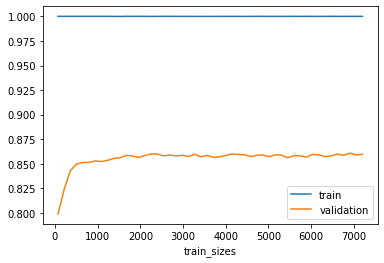

In [26]:
# learning curves
from sklearn.model_selection import learning_curve
N, training_scores, val_scores = learning_curve(RandomForestClassifier(),X_train,y_train,train_sizes=np.linspace(0.01, 1.0, 50),cv=10)
print(N)
plt.plot(N,training_scores.mean(axis=1),label='train')
plt.plot(N,val_scores.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()




# Nouvelle section

Billo Diallo

BOUE Arnaud silvere